In [10]:
import torch
from torchvision import models, transforms
from PIL import Image
import os
import torch
from torch import nn, optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import shutil


In [ ]:
data_dir = "data/EuroSAT"
train_dir = "data/train"
val_dir = "data/val"

def split_dataset():
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(val_dir):
        os.makedirs(val_dir)

    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_path):
            continue 
        images = os.listdir(os.path.join(data_dir, class_name))
        train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)

        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

        for img in train_imgs:
            src = os.path.join(data_dir, class_name, img)
            dst = os.path.join(train_dir, class_name, img)
            shutil.copyfile(src, dst)

        for img in val_imgs:
            src = os.path.join(data_dir, class_name, img)
            dst = os.path.join(val_dir, class_name, img)
            shutil.copyfile(src, dst)

split_dataset()

In [ ]:

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


train_data = datasets.ImageFolder(train_dir, transform=transform)
val_data = datasets.ImageFolder(val_dir, transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32)

device = torch.device("cuda")
model = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

num_classes = len(train_data.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.00001)

epochs = 30
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    acc = correct / total 
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}, Accuracy: {acc:.2f}")


Epoch 1/30, Loss: 1534.7969, Accuracy: 0.16
Epoch 2/30, Loss: 1319.3949, Accuracy: 0.40
Epoch 3/30, Loss: 1150.6348, Accuracy: 0.56
Epoch 4/30, Loss: 1015.1673, Accuracy: 0.64
Epoch 5/30, Loss: 904.4455, Accuracy: 0.69
Epoch 6/30, Loss: 815.4229, Accuracy: 0.73
Epoch 7/30, Loss: 745.3274, Accuracy: 0.75
Epoch 8/30, Loss: 688.6933, Accuracy: 0.77
Epoch 9/30, Loss: 639.9802, Accuracy: 0.78
Epoch 10/30, Loss: 599.5314, Accuracy: 0.79
Epoch 11/30, Loss: 562.3744, Accuracy: 0.81
Epoch 12/30, Loss: 533.7890, Accuracy: 0.81
Epoch 13/30, Loss: 504.7308, Accuracy: 0.82
Epoch 14/30, Loss: 484.2200, Accuracy: 0.83
Epoch 15/30, Loss: 461.0689, Accuracy: 0.83
Epoch 16/30, Loss: 448.5329, Accuracy: 0.83
Epoch 17/30, Loss: 432.7521, Accuracy: 0.84
Epoch 18/30, Loss: 416.3058, Accuracy: 0.84
Epoch 19/30, Loss: 403.1112, Accuracy: 0.85
Epoch 20/30, Loss: 392.6107, Accuracy: 0.85
Epoch 21/30, Loss: 382.5114, Accuracy: 0.85
Epoch 22/30, Loss: 374.3258, Accuracy: 0.85
Epoch 23/30, Loss: 362.7176, Accuracy

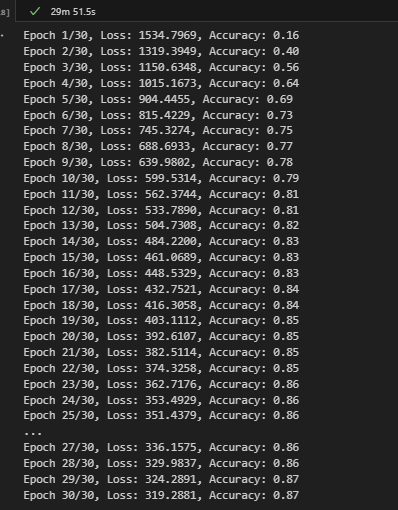

In [20]:
# model_path = "model_eurosat.pt"
# torch.save(model.state_dict(), model_path)

